In [1]:
import numpy as np
import Analysis_source as src
from importlib import reload

# Input files and colors

In [2]:
colors_btime = {'DOP' : (0.0,0.4,1.0),\
                'DON' : (0.0,0.8,1.0),\
                'SER' : (1.0,0.3,0.0),\
                'SEN' : (1.0,0.6,0.0),\
                'PHC' : (0.0,0.2,0.0),\
                'PHN' : (0.0,0.4,0.0),\
                'PHE' : (0.0,0.6,0.0),\
                'PHA' : (0.0,0.8,0.0)}
colors_btime = {key: tuple(min(1.4*(c+(np.mean(col)-c)/2.), 1) for c in col) for key, col in colors_btime.items()}

In [3]:
fnames = {"SER_H" : "BTIMES_STD/NP22ser-53_PRO1-5_btimes_STD.sfu",
          "PHE_H" : "BTIMES_STD/NP22phe-53_PRO1-4_btimes_STD.sfu",
          "DOP_H" : "BTIMES_STD/NP22dop-53_PRO1-4_btimes_STD.sfu"}#,
          #"DON_H" : "BTIMES_STD/NP22don-53_PRO1-11_btimes_STD.sfu",
          #"SEN_H" : "BTIMES_STD/NP22sen-53_PRO1-11_btimes_STD.sfu",
          #"PHC_H" : "BTIMES_STD/NP22phc-53_PRO1-11_btimes_STD.sfu",
          #"PHN_H" : "BTIMES_STD/NP22phn-53_PRO1-11_btimes_STD.sfu",
          #"PHA_H" : "BTIMES_STD/NP22pha-53_PRO1-11_btimes_STD.sfu"}

# Import data

In [4]:
btimes = {key[:3] : src.import_events(fname)[key] for key, fname in fnames.items()}
keys = btimes.keys()

Importing BTIMES_STD/NP22ser-53_PRO1-5_btimes_STD.sfu


100%|████████████████████████████████████████████████████████████████████| 5641503/5641503 [00:36<00:00, 154934.87it/s]


Importing BTIMES_STD/NP22phe-53_PRO1-4_btimes_STD.sfu


100%|████████████████████████████████████████████████████████████████████| 6212278/6212278 [00:23<00:00, 267296.08it/s]


Importing BTIMES_STD/NP22dop-53_PRO1-4_btimes_STD.sfu


100%|████████████████████████████████████████████████████████████████████| 5314948/5314948 [00:17<00:00, 303914.56it/s]


# Plotting

In [5]:
for key, val in btimes.items():
    print(key, val["dt"].min(), val["dt"].max())

SER 0.02 52.86
PHE 0.02 6.0
DOP 0.02 11.18


SER


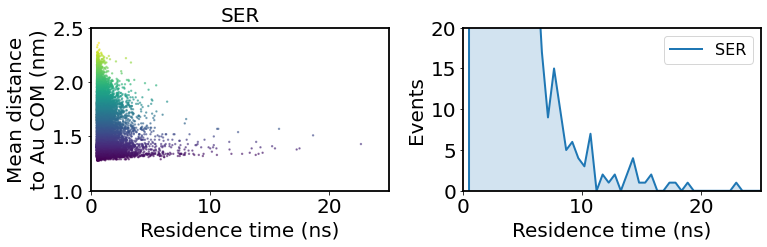

PHE


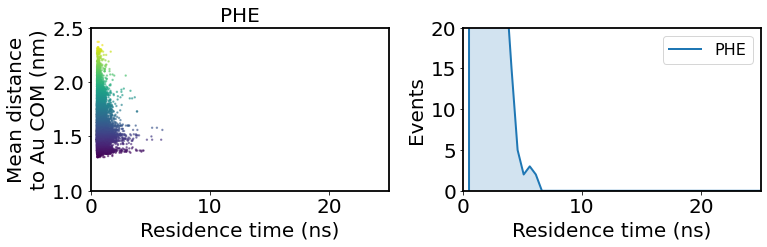

DOP


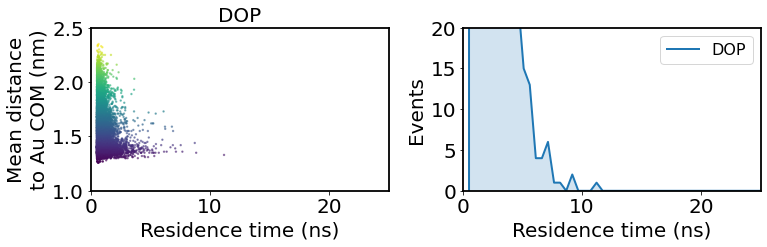

In [6]:
for key in keys:
    src.plot_btime(key, btimes=btimes, ignore_ns=0.5)

In [81]:
reload(src)

<module 'Analysis_source' from 'C:\\Users\\sfranco\\Documents\\PhD\\Data\\WaterSTD\\Analysis_source.py'>

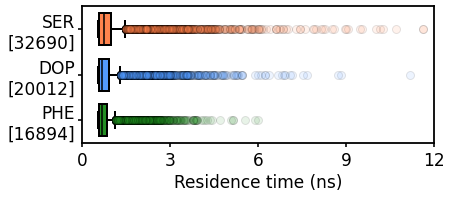

In [82]:
src.prop_boxplot("dt", ignore_ns=0.5, btimes=btimes, colors=colors_btime, ylim=(0,12), ylabel='Residence time (ns)', nticks=5, normdistr=False, savefig=True, prefix="Figures/STD")
#src.prop_boxplot("dist", ignore_ns=0.5, btimes=btimes, colors=colors_btime, ylim=(1,3.5), ylabel='Mean dist to Au COM (nm)', nticks=6, normdistr=False)

In [83]:
groups = [['SER', 'DOP'],
         ['SER', 'PHE'],
         ['DOP', 'PHE']]
#for group in groups:
#    src.plot_cluster(group, btimes=btimes, colors=colors_btime, xlim=(0,20), ylim=(1,2.5), ignore_ns=0.5)

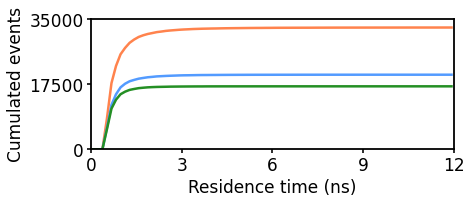

In [84]:
groups = [['SER', 'DOP', 'PHE'],
          ['SER', 'SEN'],
          ['DOP', 'DON'],
          ['PHC', 'PHN', 'PHE', 'PHA'],
          ['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA']] 

groups = [['SER', 'DOP', 'PHE']]

for group in groups:
    src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,35000), xlim=(0,12), nticks=5, ignore_ns=0.5, savefig=True, prefix="Figures/STD")
    #src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,1), xlim=(0,5), ignore_ns=0.5, normed=True)

In [109]:
reload(src)

<module 'Analysis_source' from 'C:\\Users\\sfranco\\Documents\\PhD\\Data\\WaterSTD\\Analysis_source.py'>

SER 4.275
DOP 2.925
PHE 2.025


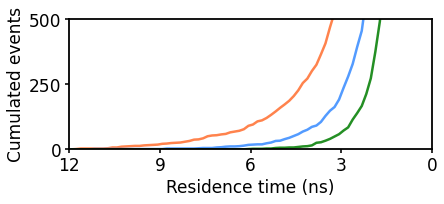

In [110]:
groups = [['SER', 'DOP', 'PHE'],
          ['SER', 'SEN'],
          ['DOP', 'DON'],
          ['PHC', 'PHN', 'PHE', 'PHA'],
          ['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA']] 

groups = [['SER', 'DOP', 'PHE']]

for group in groups:
    src.plot_cumevents(group, btimes=btimes, colors=colors_btime, ylim=(0,500), xlim=(12,0), nticks=5, ignore_ns=0.5, savefig=True, prefix="Figures/STDrev")

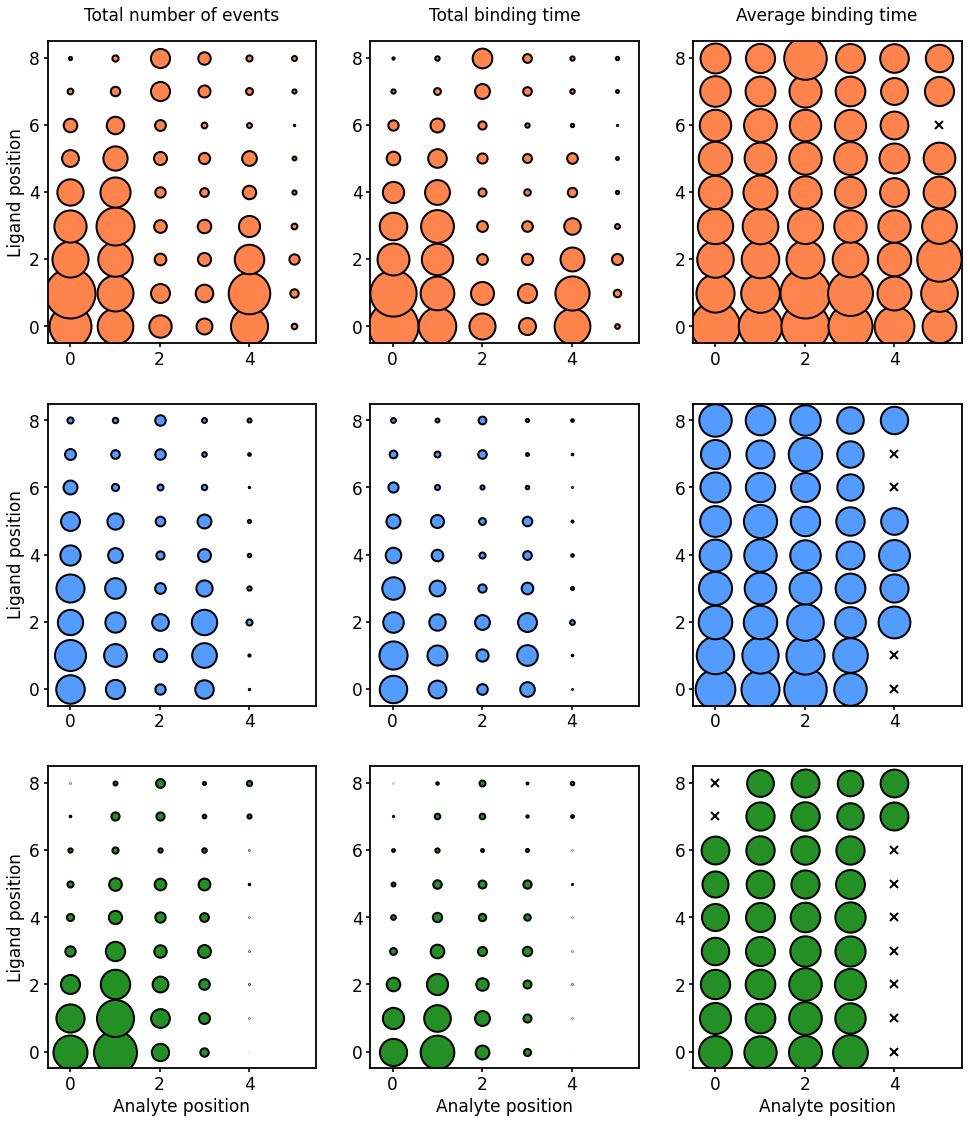

In [108]:
#src.plot_positions(['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA'], btimes=btimes, colors=colors_btime, req_sample_size=100, ignore_ns=0.5, normdistr=True)
src.plot_positions(['SER', 'DOP', 'PHE'], btimes=btimes, colors=colors_btime, req_sample_size=100, ignore_ns=0.5, normdistr=False, savefig=True, prefix="Figures/STD")

In [ ]:
#src.plot_barpositions(['SER', 'SEN', 'DOP', 'DON', 'PHC', 'PHN', 'PHE', 'PHA'], btimes=btimes, colors=colors_btime, req_sample_size=100, ignore_ns=0.5)
src.plot_barpositions(['SER', 'DOP', 'PHE'], btimes=btimes, colors=colors_btime, req_sample_size=100, ignore_ns=0.5)